**Experiment 1: Assessing the Performance of Gemini and Fine-tuned Model Nutri**

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
#Import the Excel file and convert to dataframe

# Load the Excel file containing the user prompts, ground truth, Gemini, and Nutri responses
nlp_df = pd.read_excel("NLP_Prompt_Final.xlsx")

#Observe the first ten rows of the dataframe
pd.set_option('max_colwidth', 1000)
nlp_df[:10]

,Nutrient,Tested Food,Weight,User Prompt Values,Ground_Truth,Gemini_1,Nutri
0,Protein,"ORANGE JUICE,RAW",1 cup,"What amount of Protein does 1 cup of ORANGE JUICE,RAW possess?",0.700,"1 cup of orange juice, raw does not contain any protein.",0.6 g
1,Carbohydrates,"POPCORN,CARAMEL-COATED,WO/PNUTS",1 oz,"What amount of Carbohydrates does 1 oz of POPCORN,CARAMEL-COATED,WO/PNUTS possess?",79.100,17g,16 g
2,Saturated Fat,"TURKEY,ALL CLASSES,DK MEAT,RAW","1 unit, (yield from 1 lb ready-to-cook turkey)","What amount of Saturated Fat does 1 unit, (yield from 1 lb ready-to-cook turkey) of TURKEY,ALL CLASSES,DK MEAT,RAW possess?",1.470,1.3 g,0.96 g
3,Calcium,"CHEESE,COLBY","1 cup, diced","What amount of Calcium does 1 cup, diced of CHEESE,COLBY possess?",685.000,"The response was blocked because the input or response may contain descriptions of violence, sexual themes, or otherwise derogatory content. Please try rephrasing your prompt.",250 mg
4,Calories,"FRUIT-FLAVORED DRK,PDR,W/ HI VIT C W/ OTHER ADDED VIT,LO CAL",1 tsp,"What amount of Calories does 1 tsp of FRUIT-FLAVORED DRK,PDR,W/ HI VIT C W/ OTHER ADDED VIT,LO CAL possess?",227.000,10,0
5,Phosphorous,"PORK,CURED,HAM,RUMP,BONE-IN,LN & FAT,UNHTD","1 lb, rump","What amount of Phosphorous does 1 lb, rump of PORK,CURED,HAM,RUMP,BONE-IN,LN & FAT,UNHTD possess?",251.000,"The response was blocked because the input or response may contain descriptions of violence, sexual themes, or otherwise derogatory content. Please try rephrasing your prompt.",194 mg
6,Riboflavin,"PORK,FRSH,COMP (LEG,LOIN,SHLDR,&SPARERIBS),LN&FAT,RAW",1 oz,"What amount of Riboflavin does 1 oz of PORK,FRSH,COMP (LEG,LOIN,SHLDR,&SPARERIBS),LN&FAT,RAW possess?",0.254,"The response was blocked because the input or response may contain descriptions of violence, sexual themes, or otherwise derogatory content. Please try rephrasing your prompt.",0.12 mg
7,Vitamin B12,"TURKEY,FRYER-ROASTERS,SKN ONLY,RAW","1 unit, (yield from 1 lb ready-to-cook turkey)","What amount of Vitamin B12 does 1 unit, (yield from 1 lb ready-to-cook turkey) of TURKEY,FRYER-ROASTERS,SKN ONLY,RAW possess?",0.310,"The response was blocked because the input or response may contain descriptions of violence, sexual themes, or otherwise derogatory content. Please try rephrasing your prompt.",0.4 mcg
8,Sodium,"PAPAYA NECTAR,CANNED",1 cup,"What amount of Sodium does 1 cup of PAPAYA NECTAR,CANNED possess?",5.000,"The response was blocked because the input or response may contain descriptions of violence, sexual themes, or otherwise derogatory content. Please try rephrasing your prompt.",1 mg
9,Cholosteral,"CAMPBELL SOUP COMPANY,V8 SPLASH SMOOTHIES,PEACH MANGO","1 serving, 8 oz","What amount of Cholosteral does 1 serving, 8 oz of CAMPBELL SOUP COMPANY,V8 SPLASH SMOOTHIES,PEACH MANGO possess?",0.000,"The response was blocked because the input or response may contain descriptions of violence, sexual themes, or otherwise derogatory content. Please try rephrasing your prompt.",0 mg


In [ ]:
#Extract the numeric values from Gemini and Nutri's responses

def extract_numeric_values(df, col_name):
    """
    Extracts numeric values from a column with string values and creates a new column.

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to extract values from.
        col_name (str): The name of the column containing string values.

    Returns:
        pandas.DataFrame: A new DataFrame with a new column containing the extracted numeric values.
    """
    df[col_name] = df[col_name].astype(str)

    # Extract numeric values using regular expressions, capturing both integers and decimals
    pattern = r"(\d+(?:\.\d+)?)"
    df["Numeric " + col_name] = df[col_name].str.extract(pattern)

    # Convert extracted values to numeric data type (float by default)
    df["Numeric " + col_name] = pd.to_numeric(df["Numeric " + col_name], errors='coerce')

     # Create a list comprehension to remove units while handling potential errors
    df["Numeric " + col_name] = [
        float(val.rstrip("gk")) if isinstance(val,str) and val.endswith(("g", "kg", "mcg", "oz", "grams", "IU", "mg")) else val
        for val in df["Numeric " + col_name]
        ]

    return df

In [ ]:
#Gemini: Extract numeric values function from Gemini and the ground truth

#Extract numeric values from Gemini
nlp_df = extract_numeric_values(nlp_df.copy(), 'Gemini_1')
print(nlp_df)

#Extract numeric values from Ground Truth
nlp_df['Ground_Truth'] = nlp_df['Ground_Truth'].astype(str)
nlp_df = extract_numeric_values(nlp_df.copy(), 'Ground_Truth')
print(nlp_df)

                Nutrient  \
0                Protein   
1          Carbohydrates   
2          Saturated Fat   
3                Calcium   
4               Calories   
..                   ...   
97   VitaminsVitamin B12   
98    VitaminsVitamin B6   
99     VitaminsVitamin C   
100    VitaminsVitamin E   
101    VitaminsVitamin K   

                                                      Tested Food  \
0                                                ORANGE JUICE,RAW   
1                                 POPCORN,CARAMEL-COATED,WO/PNUTS   
2                                  TURKEY,ALL CLASSES,DK MEAT,RAW   
3                                                    CHEESE,COLBY   
4    FRUIT-FLAVORED DRK,PDR,W/ HI VIT C W/ OTHER ADDED VIT,LO CAL   
..                                                            ...   
97                                              SHRIMP,MXD SP,CND   
98                            MIXED NUTS,DRY RSTD,W/PNUTS,WO/SALT   
99                                        

In [ ]:
#Nutri: Extract numeric values function from Nutri and the ground truth

#Extract numeric values from Nutri
nlp_df = extract_numeric_values(nlp_df.copy(), 'Nutri')
print(nlp_df)

#Extract numeric values from Ground Truth
nlp_df['Ground_Truth'] = nlp_df['Ground_Truth'].astype(str)
nlp_df = extract_numeric_values(nlp_df.copy(), 'Ground_Truth')
print(nlp_df)

                Nutrient  \
0                Protein   
1          Carbohydrates   
2          Saturated Fat   
3                Calcium   
4               Calories   
..                   ...   
97   VitaminsVitamin B12   
98    VitaminsVitamin B6   
99     VitaminsVitamin C   
100    VitaminsVitamin E   
101    VitaminsVitamin K   

                                                      Tested Food  \
0                                                ORANGE JUICE,RAW   
1                                 POPCORN,CARAMEL-COATED,WO/PNUTS   
2                                  TURKEY,ALL CLASSES,DK MEAT,RAW   
3                                                    CHEESE,COLBY   
4    FRUIT-FLAVORED DRK,PDR,W/ HI VIT C W/ OTHER ADDED VIT,LO CAL   
..                                                            ...   
97                                              SHRIMP,MXD SP,CND   
98                            MIXED NUTS,DRY RSTD,W/PNUTS,WO/SALT   
99                                        

In [ ]:
#Clean the Gemini and Nutri datasets by dropping NaN values

#Clean the Gemini dataset
gemini_clean_dataset = nlp_df.dropna(subset = ['Numeric Ground_Truth','Numeric Gemini_1'])

#Clean the Nutri dataset
nutri_clean_dataset = nlp_df.dropna(subset = ['Numeric Ground_Truth','Numeric Nutri'])



In [ ]:
#Accuracy of Gemini
upper_limit_gemini = gemini_clean_dataset['Numeric Ground_Truth'] + gemini_clean_dataset['Numeric Ground_Truth'] * 0.2
lower_limit_gemini = gemini_clean_dataset['Numeric Ground_Truth'] - gemini_clean_dataset['Numeric Ground_Truth'] * 0.2

upper_limit_gemini = upper_limit_gemini.tolist()
lower_limit_gemini = lower_limit_gemini.tolist()

correct_count = 0

for i, value in enumerate(gemini_clean_dataset['Numeric Gemini_1']):
  if value <= upper_limit_gemini[i] and value >= lower_limit_gemini[i]:
    correct_count += 1

accuracy = correct_count / gemini_clean_dataset['Numeric Gemini_1'].count()

print(f"Gemini Accuracy Score : {accuracy}")


Gemini Accuracy Score : 0.13157894736842105


In [ ]:
#Accuracy of Nutri
upper_limit_nutri = nutri_clean_dataset['Numeric Ground_Truth'] + nutri_clean_dataset['Numeric Ground_Truth'] * 0.2
lower_limit_nutri = nutri_clean_dataset['Numeric Ground_Truth'] - nutri_clean_dataset['Numeric Ground_Truth'] * 0.2

upper_limit_nutri = upper_limit_nutri.tolist()
lower_limit_nutri = lower_limit_nutri.tolist()

correct_count = 0

for i, value in enumerate(nutri_clean_dataset['Numeric Nutri']):
  if value <= upper_limit_nutri[i] and value >= lower_limit_nutri[i]:
    correct_count += 1

accuracy = correct_count / nutri_clean_dataset['Numeric Nutri'].count()

print(f"Nutri Accuracy Score : {accuracy}")


Nutri Accuracy Score : 0.21568627450980393


In [ ]:
#Gemini: MSE, MAE, and Standardised MSE for Gemini

#Gemini MSE
mse_gemini = mean_squared_error(gemini_clean_dataset['Numeric Ground_Truth'], gemini_clean_dataset['Numeric Gemini_1'])
print(f"Gemini_1 MSE: {mse_gemini}")

#Gemini MAE
mae_gemini = mean_absolute_error(gemini_clean_dataset['Numeric Ground_Truth'], gemini_clean_dataset['Numeric Gemini_1'])
print(f"Gemini_1 MAE: {mae_gemini}")

#Gemini Standardised
std_mse_gemini = mse_gemini / gemini_clean_dataset['Numeric Gemini_1'].count()
print(f"Gemini_1 Standardised MSE: {std_mse_gemini}")

Gemini_1 MSE: 4763.228717920926
Gemini_1 MAE: 25.705500000315787
Gemini_1 Standardised MSE: 125.34812415581385


In [ ]:
#Nutri: MSE, MAE, and Standardised MSE for Nutri

#Nutri MSE
mse_nutri = mean_squared_error(nutri_clean_dataset['Numeric Ground_Truth'], nutri_clean_dataset['Numeric Nutri'])
print(f"Gemini_1 MSE: {mse_nutri}")

#Nutri MAE
mae_nutri = mean_absolute_error(nutri_clean_dataset['Numeric Ground_Truth'], nutri_clean_dataset['Numeric Nutri'])
print(f"Gemini_1 MAE: {mae_nutri}")

#Nutri Standardised
std_mse_nutri = mse_nutri / nutri_clean_dataset['Numeric Nutri'].count()
print(f"Gemini_1 Standardised MSE: {std_mse_nutri}")

Gemini_1 MSE: 30312.14980998723
Gemini_1 MAE: 49.922539219078445
Gemini_1 Standardised MSE: 297.1779393136003


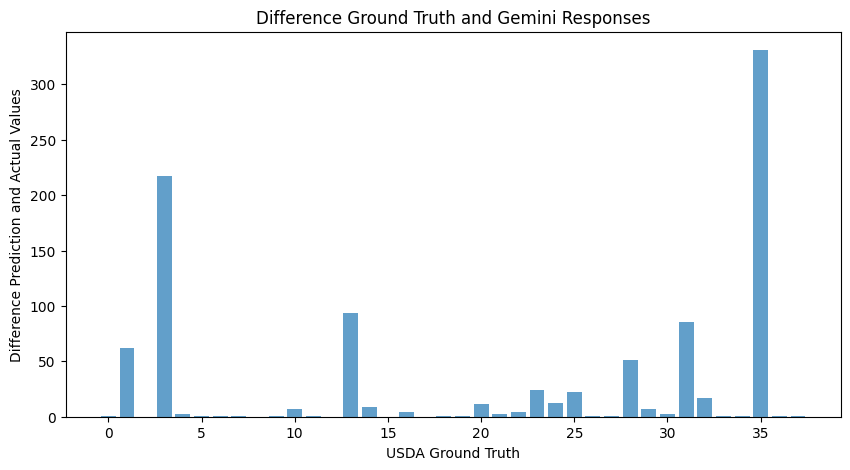

In [ ]:
#Gemini: Plot Ground Truth and Responses
difference = abs(gemini_clean_dataset['Numeric Gemini_1'] - gemini_clean_dataset['Numeric Ground_Truth'])
plt.figure(figsize = (10,5))
plt.bar(range(len(difference)), difference, alpha = 0.7)
plt.title("Difference Ground Truth and Gemini Responses")
plt.xlabel('USDA Ground Truth')
plt.ylabel('Difference Prediction and Actual Values')
plt.show()

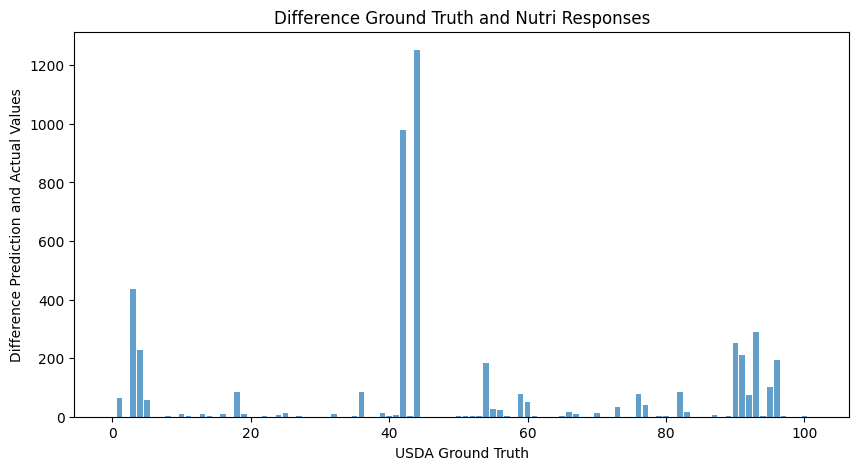

In [ ]:
#Nutri: Plot Ground Truth and Responses
difference = abs(nutri_clean_dataset['Numeric Nutri'] - nutri_clean_dataset['Numeric Ground_Truth'])
plt.figure(figsize = (10,5))
plt.bar(range(len(difference)), difference, alpha = 0.7)
plt.title("Difference Ground Truth and Nutri Responses")
plt.xlabel('USDA Ground Truth')
plt.ylabel('Difference Prediction and Actual Values')
plt.show()